<a href="https://colab.research.google.com/github/sohyunan99/sohyun.an/blob/python-project/SEPHORA_%EC%A0%9C%ED%92%88_%ED%92%88%EC%A0%88_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

shutil.copy("/content/drive/MyDrive/Colab Notebooks/기말프로젝트/SEPHORA/product_info.csv", "/content")

'/content/product_info.csv'

In [ ]:
import pandas as pd

productinfo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/기말프로젝트/SEPHORA/product_info.csv')
productinfo

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


**'loves_count', 'rating', 'price_usd'로 'out of stock' 여부 예측**

In [ ]:
selected_columns = ['product_id', 'loves_count', 'rating', 'price_usd', 'out_of_stock']
extracted_exclusive = productinfo[selected_columns]
extracted_exclusive

,product_id,loves_count,rating,price_usd,out_of_stock
0,P473671,6320,3.6364,35.0,0
1,P473668,3827,4.1538,195.0,0
2,P473662,3253,4.2500,195.0,0
3,P473660,3018,4.4762,195.0,0
4,P473658,2691,3.2308,195.0,0
...,...,...,...,...,...
8489,P467659,2790,4.4286,150.0,0
8490,P500874,2319,4.6367,106.0,0
8491,P504428,1475,5.0000,134.0,1
8492,P504448,840,NaN,167.0,0


In [ ]:
extracted_exclusive.isna().sum()

product_id        0
loves_count       0
rating          278
price_usd         0
out_of_stock      0
dtype: int64

In [ ]:
extracted_exclusive.dropna(subset=['rating'], inplace=True)

<ipython-input-7-cb94282bb8b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_exclusive.dropna(subset=['rating'], inplace=True)


In [ ]:
extracted_exclusive.isna().sum()

product_id      0
loves_count     0
rating          0
price_usd       0
out_of_stock    0
dtype: int64

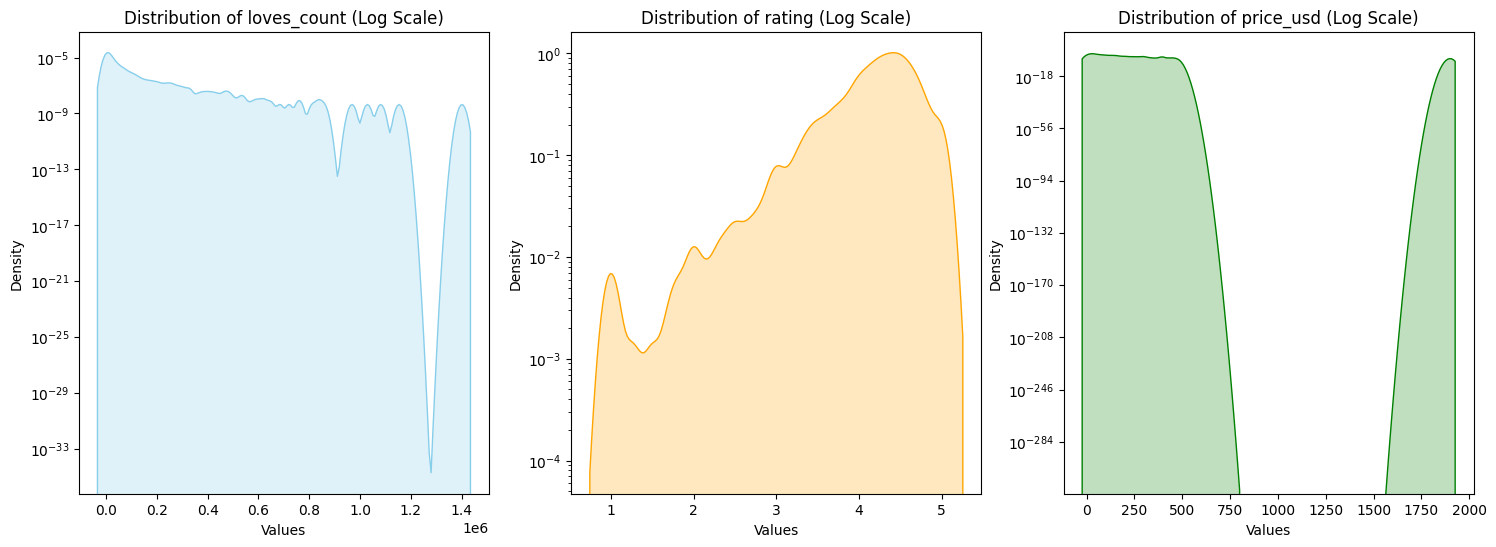

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#'loves_count', 'rating', 'price_usd'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # 1행 3열의 서브플롯 생성

# 각 칼럼에 대한 로그 스케일 적용한 area chart 그리기
sns.kdeplot(data=extracted_exclusive, x='loves_count', fill=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of loves_count (Log Scale)')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Density')
axes[0].set_yscale('log')  # y축에 로그 스케일 적용

sns.kdeplot(data=extracted_exclusive, x='rating', fill=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of rating (Log Scale)')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Density')
axes[1].set_yscale('log')  # y축에 로그 스케일 적용

sns.kdeplot(data=extracted_exclusive, x='price_usd', fill=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of price_usd (Log Scale)')
axes[2].set_xlabel('Values')
axes[2].set_ylabel('Density')
axes[2].set_yscale('log')  # y축에 로그 스케일 적용

plt.show()

**다중공선성 검사**

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# product_id는 범주형 변수로, 다중공선성을 계산할 필요가 없으므로 제외합니다.
selected_columns = ['loves_count', 'rating', 'price_usd']
X = extracted_exclusive[selected_columns]

# 상수항을 추가합니다.
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

      Features        VIF
0        const  67.183600
1  loves_count   1.010098
2       rating   1.005457
3    price_usd   1.011590


In [ ]:
from sklearn.model_selection import train_test_split

target = extracted_exclusive['out_of_stock']
features = extracted_exclusive[['loves_count', 'rating', 'price_usd']]

# 데이터 분할 (훈련 데이터 80%, 테스트 데이터 20%)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 확인을 위해 각 데이터의 크기 출력
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (6572, 3)
Testing data size: (1644, 3)


In [ ]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
log_reg = LogisticRegression()

# 모델 훈련
log_reg.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.933698296836983


In [ ]:
from sklearn.metrics import classification_report

# 분류 보고서 출력
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1535
           1       1.00      0.00      0.00       109

    accuracy                           0.93      1644
   macro avg       0.97      0.50      0.48      1644
weighted avg       0.94      0.93      0.90      1644



In [ ]:
import statsmodels.api as sm

# 로지스틱 회귀 모델 생성
log_reg = sm.Logit(y_train, sm.add_constant(X_train))  # X_train에 상수항 추가
result = log_reg.fit()

# Pseudo R-squared 값 출력
print("Pseudo R-squared (McFadden's R-squared):", result.prsquared)

Optimization terminated successfully.
         Current function value: 0.255855
         Iterations 8
Pseudo R-squared (McFadden's R-squared): 0.018401788805491925


In [ ]:
# 모든 계수에 대한 p-value 출력
print("\nP-values for coefficients:")
print(result.pvalues)


P-values for coefficients:
const          0.002747
loves_count    0.000003
rating         0.000727
price_usd      0.000320
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# loves_count, rating, price_usd를 표준화
extracted_exclusive[['loves_count', 'rating', 'price_usd']] = scaler.fit_transform(extracted_exclusive[['loves_count', 'rating', 'price_usd']])

<ipython-input-17-e32f2fe2d5af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_exclusive[['loves_count', 'rating', 'price_usd']] = scaler.fit_transform(extracted_exclusive[['loves_count', 'rating', 'price_usd']])


In [ ]:
from sklearn.linear_model import LogisticRegression

# 여기에 데이터 및 모델 훈련 코드가 있다고 가정합니다.

# logistic regression 모델을 훈련한 후에 변수의 가중치 출력
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)  # X_train은 입력 변수, y_train은 목표 변수

# 여기서 X_train은 입력 변수 데이터를 나타냅니다.
variables = X_train.columns  # 변수 이름을 가져옵니다.

# 각 변수의 가중치 출력
print("각 변수의 가중치:", logistic_model.coef_)

각 변수의 가중치: [[-8.33888817e-06 -4.83790452e-01 -4.92310803e-03]]


**표준화**

In [ ]:
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
scaler = StandardScaler()

# 훈련 데이터에 대해 스케일링 적용하고 적합
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터에도 동일한 스케일링 적용
X_test_scaled = scaler.transform(X_test)

# 표준화된 데이터로 로지스틱 회귀 모델 생성 및 훈련
log_reg_scaled = LogisticRegression()
log_reg_scaled.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred_scaled = log_reg_scaled.predict(X_test_scaled)

In [ ]:
# 표준화된 데이터로 로지스틱 회귀 모델 생성 및 훈련
log_reg_scaled = LogisticRegression()
log_reg_scaled.fit(X_train_scaled, y_train)

# 각 변수(특성)와 그에 대응되는 가중치 출력
coefficients = log_reg_scaled.coef_[0]
feature_names = ['loves_count', 'rating', 'price_usd']  # 각 변수의 이름을 적절히 지정해야 합니다.

# 변수(특성)명과 가중치 출력
for feature, coef in zip(feature_names, coefficients):
 print(f"{feature}: {coef}")

loves_count: -0.5342138987833128
rating: -0.14205652671101837
price_usd: -0.24449966742578866


#**AI 예측 모델**

In [ ]:
import numpy as np

new_data = np.array([[1000, 4.5, 300]])

# 표준화된 모델을 사용하여 새로운 데이터에 대한 예측 수행
prediction = log_reg_scaled.predict(new_data)
print("Prediction for new data:", prediction)

if(prediction[0] == 0):
    print('AI: This product is out of stock.')
else:
    print('AI: This product is available.')

Prediction for new data: [0]
AI: This product is out of stock.
